In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [50]:
run1 = RunManager('StatArbStrategy', 'run_0127')
run2 = RunManager('StatArbStrategy', 'run_0164')

In [10]:
run1 = RunManager('StatArbStrategy', 'run_0161', test_periods=0)
run2 = RunManager('StatArbStrategy', 'run_0164', test_periods=0)

In [11]:
# Create combo search
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 20

comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [04:23<00:00, 13.38s/it]


In [12]:
# Create combo search
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 20

comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:08<00:00,  9.93s/it]


In [28]:
# Create combo search
comb3 = CombinationSearch()
comb3.set_selection_criteria('sharpe')
comb3.params['training_epochs'] = 20

comb3.add_run(run1)
comb3.add_run(run2)
comb3.start()

  0%|          | 0/20 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 20/20 [04:28<00:00, 13.25s/it]


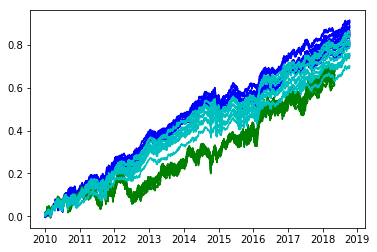

In [29]:
plt.figure()
plt.plot(comb1.best_results_returns.dropna().cumsum(), 'b')
plt.plot(comb2.best_results_returns.dropna().cumsum(), 'g')
plt.plot(comb3.best_results_returns.dropna().cumsum(), 'c')
plt.show()

In [35]:
x = comb1.best_results_returns.iloc[:, 0]
y = comb2.best_results_returns.iloc[:, 0]
z = comb3.best_results_returns.iloc[:, 0]
xy = (x + y) / 2

In [37]:
df = x.to_frame()
df[1] = y
df[2] = z
df[3] = xy

In [41]:
df.head()

,0,1,2,3
2009-01-02,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN


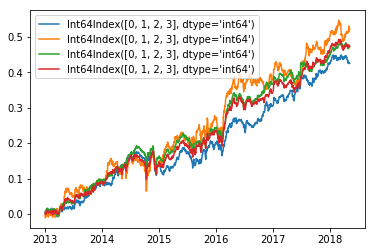

In [46]:
plt.figure()
plt.plot(df.dropna().loc[dt.date(2013, 1, 1):].cumsum(), label=df.columns)
plt.legend()
plt.show()

In [47]:
get_stats(df.loc[dt.date(2013, 1, 1):].dropna())

,0,1,2,3
Total,0.4257,0.5222,0.4731,0.4740
Mean,0.0003,0.0004,0.0004,0.0004
Std,0.0036,0.0057,0.0035,0.0037
Skew,0.0515,0.0220,0.0739,0.0309
Kurt,2.0500,1.7700,2.8000,2.0000
Sharpe,1.3880,1.0857,1.6040,1.4925
Sortino,2.4114,1.8821,2.8237,2.6191
MinRet,-0.0162,-0.0275,-0.0170,-0.0171
WinP,0.5416,0.5260,0.5513,0.5468
DD%,-0.0696,-0.1071,-0.0630,-0.0701


In [8]:
df = rollup_returns(comb1.best_results_returns)
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,0.000000,0.000000,0.000000,0.000000,0.000000
2010,0.044677,0.015131,-0.001916,0.038050,0.095942
2011,0.018212,-0.027107,-0.007445,0.035808,0.019468
2012,0.056793,-0.086914,0.007716,0.061373,0.038968
2013,0.004246,0.043778,0.016292,0.029985,0.094301
2014,0.048289,0.022730,-0.039118,0.020583,0.052483
2015,0.040955,0.022187,-0.008063,0.066465,0.121544
2016,0.084364,0.015455,0.009313,0.004998,0.114131
2017,0.014879,-0.010492,0.082301,0.025878,0.112566


# Optimize on mean

In [48]:
# Create combo search
comb1 = CombinationSearch()
comb1.set_selection_criteria('mean')
comb1.params['training_epochs'] = 20

comb1.add_run(run1)
comb1.start()

  0%|          | 0/20 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 20/20 [03:52<00:00, 11.64s/it]


In [49]:
# Create combo search
comb2 = CombinationSearch()
comb2.set_selection_criteria('mean')
comb2.params['training_epochs'] = 20

comb2.add_run(run2)
comb2.start()

  0%|          | 0/20 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 20/20 [02:51<00:00,  8.79s/it]
